In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [56]:
data = pd.read_csv('./data/train.csv', sep=',')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


Упс колонка __Helthcare_2__ с ошибкой, исправим её

In [57]:
data.rename(columns={"Helthcare_2": "Healthcare_2"}, inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Healthcare_2   10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [59]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Имеем категориальные признаки __Ecology_2__, __Ecology_3__, __Shops_2__ <br>
Также признаки __LifeSquare__ и __Healthcare_1__ имеют много пропусков

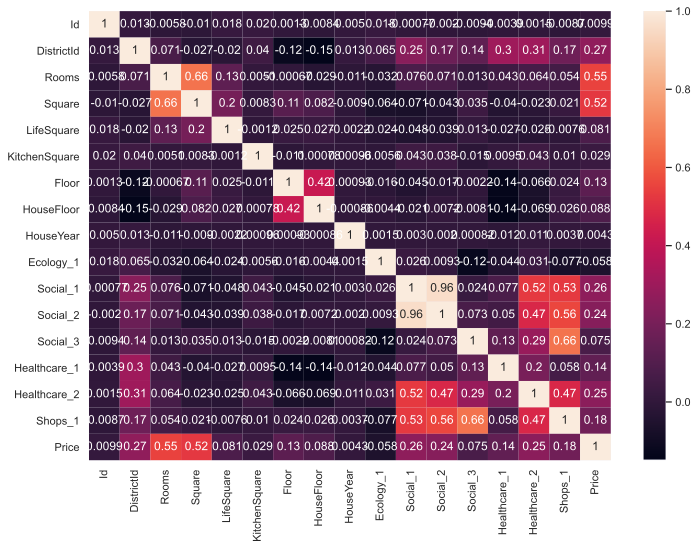

In [60]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

hm = sns.heatmap(data.corr(), annot=True)

Признаки __Social_2__ и __Social_1__ имеют очень сильную корреляцию между собой <br>
С целевой переменной __price__ имеют сильную корреляцию признаки __Rooms__ и __Square__

Попробуем в лоб заполнить пропуски средними значениями

In [61]:
values = {"LifeSquare": data["LifeSquare"].mean(), "Healthcare_1": data["Healthcare_1"].mean()}

f_data = data.fillna(value=values)

f_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.588742,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,736.734238,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,37.199645,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1142.904460,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1142.904460,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Взглянем коррелирующие признаки

In [63]:
target = "Price"

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax_rooms, ax_square = ax.flatten()

fig.set_size_inches(12, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax_rooms.scatter(x=f_data["Rooms"], y=f_data[target])
ax_rooms.set_title('График комнат')
ax_rooms.set_xlabel('Rooms')
ax_rooms.set_ylabel(target)

ax_square.scatter(x=f_data["Square"], y=f_data[target])
ax_square.set_title('График площади')
ax_square.set_xlabel('Square')
ax_square.set_ylabel(target)

plt.show()

Есть некоторые выбросы, но что интереснее квартиры с 0 комнат и 0 площадь имеют цену. Возможно, это такие же выбросы. Хоть кол-во комнат численный признак, он больше похож на категориальный

In [65]:
target_mean = round(f_data[target].mean(), 2)
target_median = f_data[target].median()
target_mode = f_data[target].mode()[0]

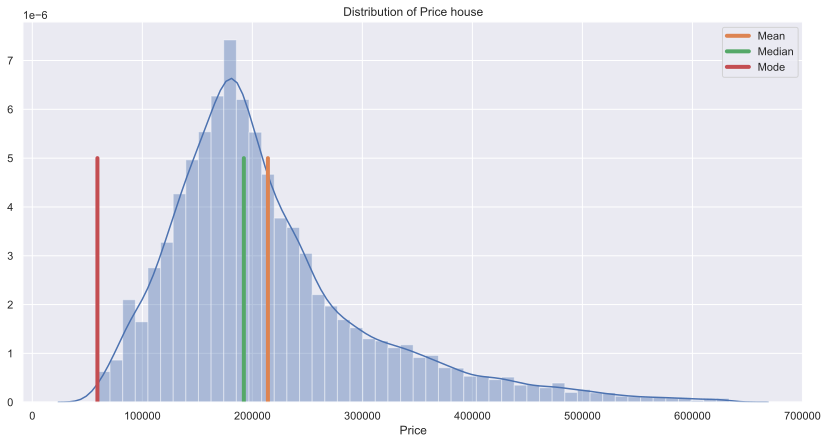

In [66]:
plt.figure(figsize=(14, 7))

sns.distplot(f_data[target], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='Mean', linewidth=4)
plt.plot([target_median] * 10, y, label='Median', linewidth=4)
plt.plot([target_mode] * 10, y, label='Mode', linewidth=4)

plt.title('Distribution of Price house')
plt.legend()
plt.show()

Так как признаков много, то чтобы визуалировать на графике применим алгоритм TSNE

In [67]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [68]:
df = pd.get_dummies(f_data, drop_first=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Ecology_2_B,Ecology_3_B,Shops_2_B
0,11809,27,3.0,115.027311,37.199645,10.0,4,10.0,2014,0.075424,11,3097,0,1142.90446,0,0,305018.871089,1,1,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00000,1,0,177734.553407,1,1,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.00000,3,1,282078.720850,1,1,1
3,2352,1,1.0,40.409907,37.199645,1.0,10,22.0,1977,0.007122,1,264,0,1142.90446,0,1,168106.007630,1,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,1142.90446,0,6,343995.102962,1,1,1


In [69]:
target_df = df[target]
train_df = df.drop(target, axis=1)

train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Ecology_2_B,Ecology_3_B,Shops_2_B
0,11809,27,3.0,115.027311,37.199645,10.0,4,10.0,2014,0.075424,11,3097,0,1142.90446,0,0,1,1,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.00000,1,0,1,1,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.00000,3,1,1,1,1
3,2352,1,1.0,40.409907,37.199645,1.0,10,22.0,1977,0.007122,1,264,0,1142.90446,0,1,1,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,1142.90446,0,6,1,1,1


In [70]:
df_train, df_test, target_train, target_test = train_test_split(train_df, target_df, test_size=0.3, random_state=42)

In [71]:
scaler = StandardScaler()

train_scaled_data = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
test_scaled_data = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [72]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

train_tsne_df = tsne.fit_transform(train_scaled_data)

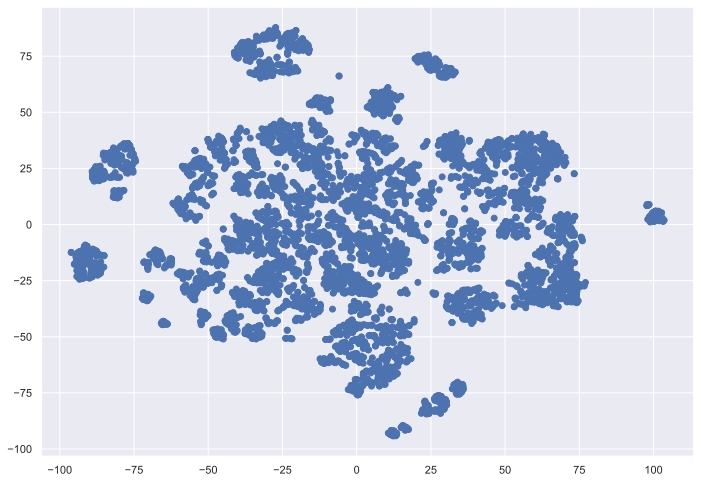

In [73]:
plt.scatter(train_tsne_df[:, 0], train_tsne_df[:, 1])
plt.show()

Выглядит странно, никаких новых данных нет

In [84]:
from typing import Tuple


class Pipeline:
    """Обработка данных для обучения"""
    lr_scaler = StandardScaler()

    def load(self, df: pd.DataFrame, strategy: str) -> pd.DataFrame:
        f_data = self._fix_name(df)
        f_data = self._fill_nan(f_data, strategy)
        f_data = self._dummy_data(f_data)
        f_data = self._clean_outlines(f_data)
        
        return f_data
    
    @classmethod
    def scale_for_lr(
        cls,
        df_train: pd.DataFrame,
        df_test: pd.DataFrame
    ) -> Tuple[pd.DataFrame, pd.DataFrame]:
        train_scaled_data = pd.DataFrame(cls.lr_scaler.fit_transform(df_train), columns=df_train.columns)
        test_scaled_data = pd.DataFrame(cls.lr_scaler.transform(df_test), columns=df_test.columns)
        return train_scaled_data, test_scaled_data

    def _dummy_data(self, df: pd.DataFrame) -> pd.DataFrame:
        return pd.get_dummies(df, drop_first=True)
    
    def _clean_outlines(self, df: pd.DataFrame) -> pd.DataFrame:
        cleared_df = pd.DataFrame()
        for column in df:
            cleared_df[column] = df[column].between(df[column].quantile(.15), df[column].quantile(.85))
        return cleared_df
    
    def _fill_nan(self, df: pd.DataFrame, strategy: str) -> pd.DataFrame:
        values = {
            "LifeSquare": getattr(data["LifeSquare"], strategy),
            "Healthcare_1": getattr(data["Healthcare_1"], strategy)
        }
        return df.fillna(value=values)
    
    def _fix_name(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.rename(columns={"Helthcare_2": "Healthcare_2"})


In [89]:
lr = LinearRegression()
pipe = Pipeline()

target_df = data[target]
main_df = data.drop(target, axis=1)

prepared_data = pipe.load(main_df, 'mean')
X_train, X_test, y_train, y_test = train_test_split(prepared_data, target_df, test_size=0.3, random_state=42)

X_train_scaled, X_test_scaled = pipe.scale_for_lr(X_train, X_test)


lr.fit(X_train_scaled, y_train)

LinearRegression()

In [90]:
y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

-1.8123582501838814e+27

Регрессия работает очень плохо, надо попробовать деревья